# `Primer Bloque`

Derivadas
- Forma analítica
- Diferencia finita
    - Aproximaciones en diferencia no centradas: Diferencia hacia adelante. Diferencia hacia atrás.
    - Aproximación de diferencia central.
    - Segunda derivada.
    - Discretización.
    - Reformulación para el caso discreto.
    - Extrapolación de Richardson
- Diferenciación Automática 
    - Número duales
    - Funciones especiales
- Ejercicios

### Forma Analítica
En la clase anterior, vimos el método de la secante (v1), dicho método consistía en sustituir en el método de Newton la definición de la derivada. A continuación vamos a profundizar un poco más en `cómo` computar derivadas numéricas.


Las derivadas aparecen en todas las áreas de la ciencia, ejemplos:
\begin{equation}
\vec{v}=\frac{\vec{r}}{dt}, \quad\quad \vec{E}=-\nabla\phi-\frac{\partial \vec{A}}{\partial t}
\end{equation}

Como todos sabemos la derivada de una función $f$ en un punto $x$ se define de forma usual como:
$$
\frac{df(x)}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}
$$

En la práctica no solemos usar esta definición, sino usamos *reglas* deducidas a partir de esta. Por ejemplo, intentemos probar por la definición el siguiente resultado:

$$
\frac{d}{dx}(x^2\sin x)=x^2\cos x +2x\sin x.
$$

¿Complicado?

Ahora, hay ocasiones en que es bastante más complejo como por ejemplo:
$$\frac{d}{dx} (\sin x)^{\tan x}=¿?$$

De manera general cuando tenemos una expresión analítica $f(x)$ podemos calcular "a mano" las diferentes derivadas, y en el peor de los casos usar programas como Mathematica, o el propio Python con la librería *SymPy* para obtenerlas. 

Ahora, en muchas ocasiones  tenemos, en cambio, un conjunto de $n$ puntos de datos discretos (es decir, una tabla de tuplas $(x_i, f(x_i))$ con $i = 0,1,...,n − 1$). En estos casos podemos abordar el problema desde tres ángulos:

- El primero, podemos utilizar la interpolación o el ajuste (fit) de datos a un modelo (métodos que veremos más adelante). Esto nos permitiría tener una nueva función que se aproxima razonablemente bien a los datos y luego aplicar la diferenciación analítica a esta.

Esta aproximación es especialmente útil cuando se trata de datos ruidosos. Sin embargo, el que una función se aproxima bastante bien a un conjunto de puntos de datos no significa que también capture información sobre sus derivadas. (De hecho, como veremos en próximas clases, algúnos métodos de interpolación y fit, asumen condiciones sobre la primera derivada). En otras palabras, interpolar/ajustar y luego tomar la derivada no proporciona mucha orientación sobre el error involucrado cuando estamos interesados en la derivada producto de no estar seguros de que es la función analítica correcta.

- El segundo enfoque se llama `diferencia finitas` y nos permite sistematizar nuestra ignorancia de la función correcta. Este enfoque también es conocido `diferenciación numérica`. 

En pocas palabras, este método hace uso del desarrollo en serie de Taylor de la función que nos interesa derivar alrededor del punto específico donde deseamos evaluar la derivada. 

- Un tercer enfoque es conocido como `diferenciación automática` y es tan preciso como la diferenciación analítica, pero trata con números en lugar de expresiones matemáticas.

## Diferencia finita

Partiendo de la definición anterior
$$
\frac{df(x)}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}
$$

podemos notar que mientras más pequeño es $h$ el numerador es más pequeño, y también el denominador magnificandose así cualquier error que se cometa en la evaluación del numerador.

A continuación veremos como podemos intentar "remediar" esto usando la serie de Taylor (alrededor de $\tilde{x}$) de la función.

#### Aproximaciones en diferencia no centradas

`Diferencia hacia adelante`

Partamos de la serie de Taylor de la función alrededor del punto $x$ donde queremos computar la derivada

<center><img src="capturas/51.png"></center>

¿Están de acuerdo con la expresión anterior? No era 
$$f(x)=\sum \frac{f^{(n)}(\tilde x)}{n!}(x-\tilde x)^n$$

¿Qué paso? Recordar que $h=x-\tilde x$. Donde $\tilde x$ es el punto alrededor del cual computamos la serie, es decir la $x$ usada en la primera expresion.

Una vez aclarado lo anterior, consideremos que estamos muy cerca y quedemosno con los primero ordenes
<center><img src="capturas/52.png"></center>
<center><img src="capturas/53.png"></center>

Esta última expresión es conocida como la `primera aproximación en diferencia hacia adelante`. Como se aprecia solo consiste en usar sólo el resultado del lado derecho para evaluar la derivada, lo que nos deja un `error` del orden $O(h)$ (recordar que $h$ es la distancia entre los dos ptos.)

Graficamente lo que tenemos es que se comienza en $x$ y luego nos movemos en la dirección derecha hasta $x+h$. En otras palabras, la derivada no es más que la pendiente del segmento de recta que conecta $f(x)$ con $f(x+h)$
<center><img src="capturas/54.png"></center>

`COMENTARIO:` La expresión obtenida es "igual" a la definición de derivada, sin embargo producto de que fue obtenida a partir de la serie de Taylor, tenemos una idea del `error` al que corresponde esta aproximación. Es posible que todavía sufra los problemas mencionados anteriormente (numerador pequeño, denominador pequeño), pero al menos ahora tenemos alguna orientación sobre qué tan bien lo estamos haciendo: si la h no es demasiado pequeña (de modo que todavía estemos lejos de las mayores cuestiones de redondeo), reducir a la mitad la h debería duplicar la calidad de la aproximación (en términos absolutos).

`Diferencia hacia atrás`

Es muy similar al caso anterior, solo que ahora hay que tener presente que $h=\tilde x - x$. Partiendo de la serie de Taylor resultante:

<center><img src="capturas/55.png"></center>

Quedandonos a primer orden llegamos a:
<center><img src="capturas/56.png"></center>

Esta expresión es conocida como `la primera aproximación en diferencias hacia atrás`. 

Se llama diferencia hacia atrás porque comienza en $x$ y luego se mueve en dirección negativa hasta $x − h$. Siendo el resultado la pendiente del segmento de recta que conecta $f(x−h)$ y $f(x)$. Las diferencias hacia adelante y hacia atrás son muy similares.

In [1]:
# implementacion
def difFinNC(f, x, h, der=True, izq=False):
    """
    """
    fd = (f(x+h) - f(x))/h if der else (f(x)-f(x-h))/h 
    return fd

### Aproximación de diferencia central

Intentemos ahora encontrar una manera de aproximar la derivada usando una diferencia finita, pero con mayor precisión que con la diferencia hacia adelante/hacia atrás. 

Partiendo del desarrollo de Taylor de nuestra función $f$ alrededor del punto $x$ donde queremos conocer la derivada
<center><img src="capturas/57.png"></center>
<center><img src="capturas/58.png"></center>

Notar que esta vez elegimos hacer un paso de tamaño $h/2$ (a diferencia del $h$ de la sección anterior), y que nos "expandimos" tanto hacia adelante como hacia atrás. 

A simple vista podemos ver que si sumamos (restamos) ambas expresiones obtendremos una expresión que contiene sólo derivadas pares (impares). Como estamos interesados en la primera, restando llegamos a:
<center><img src="capturas/59.png"></center>

Lo que conduce a:
<center><img src="capturas/60.png"></center>

Esta expresión es conocida como  `primera aproximación para diferencia central`. Similar a los casos anteriores, acá solo requerimos dos evaluaciones, sin embargo como se aprecia el error es de orden 2 en $h$, y también como esta $h$ es más pequeña que las anteriores tendremos en general un error menor.


Graficamente lo que hacemos es:
<center><img src="capturas/61.png"></center>

Como se aprecia se llama diferencia central porque las dos evaluaciones están en $x − h/2$ y en $x + h/2$, es decir, están centradas en $x$. Claramente, la diferencia central no es otra cosa que la pendiente del segmento de recta que conecta $f(x−h/2)$ y $f(x+h/2)$.


`COMENTARIO 1`: Noten que si escogemos una $h$ no muy pequeña (de modo que todavía estamos lejos de problemas importantes de redondeo), el reducirla a la mitad debería cuadruplicar la calidad de la aproximación (en términos absolutos).


`COMENTARIO 2`: Existe una situación (muy común en la práctica) en la que una aproximación en diferencia central simplemente no es utilizable. Si tenemos un conjunto de $n$ puntos de datos discretos de la forma $(xi, f(xi))$ para $i = 0,1,...,n − 1$ `no podremos usar una diferencia central` para aproximar la derivada en $x_0$ o en $x_{n−1}$. Para cualquiera de los puntos "intermedios" siempre podríamos usar dos evaluaciones (una a la izquierda, otra a la derecha), pero para los dos puntos finales simplemente no tenemos puntos disponibles "en el otro lado", por lo que es necesaria una diferencia hacia adelante/hacia atrás.

In [2]:
# implementacion
def difFinC(f, x, h):
    """
    """
    fd = (f(x+h/2) - f(x-h/2))/h
    return fd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## Comparemos
f = lambda x: np.sin(x)**(np.tan(x))
df = lambda x: (1+np.log(np.sin(x))/(np.cos(x)**2))*f(x)

x = 0.2
hval = [10.**(-i) for i in np.arange(1, 20, 1)]

# implementacion
datD = np.array([difFinNC(f, x, h) for h in hval])
datC = np.array([difFinC(f, x, h) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatC = abs(datC-dfx)

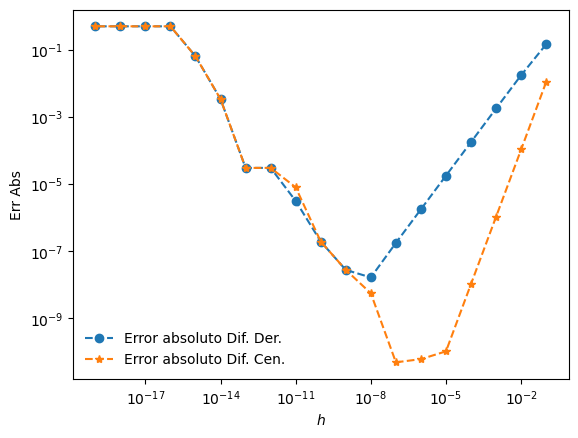

In [17]:
plt.plot(hval, EdatD, ls='--', marker='o', label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', marker='*', label=r'Error absoluto Dif. Cen.')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)

`Noten` que la parte derecha del gráfico estamos dominados por el error de `truncamiento/aproximación`. En esta región la diferencia central es claramente superior, ya que el error absoluto es consistentemente menor. En esta región, podemos ver:

- cuando $h$ cambia en un orden de magnitud, el error de la diferencia a la derecha cambia en un orden de magnitud, mientras que el error de la diferencia central cambia en dos órdenes de magnitud. 

A medida que nos movemos hacia la izquierda, más allá de cierto punto el error de `redondeo` comienza a dominar y la diferencia hacia adelante es tan buena (o tan mala) como la diferencia central. 

Dejamos de trazar cuando el error es tan grande que fallamos por completo en la evaluación de la derivada.

`Comentario`: los errores de redondeo aparecen del hecho de que los coeficientes se redondean a cero.

`Mejorando la precisión`: ver PDF "Formulae_DerivationDifFinit.pdf"

### Segunda derivada

En la práctica, también necesitamos derivadas de orden superior: la segunda derivada de hecho es una de las más usadas en por los científicos (usualmente todas las ecuaciones llegan hasta ese orden. ¿Saben por qué?).

Similar a la primera se pueden establecer expresiones de diferencia hacia adelante, hacia atrás y central para aproximar la segunda derivada. Una manera de calcularla sería simplemente derivando las expresiones anteriores, por ejemplo:
<center><img src="capturas/62.png"></center>

Sin embargo, nuevamente, acá no tendríamos noción del error. 


¿Alguna otra alternativa?

Si recuerdan, anteriormente vimos que si sumamos o restamos las series de Taylor hacia adelante y hacia atrás podiamos obtener terminos con derivadas pares o impares. En nuestro caso enfoquemonos en la diferencia central sumando estas dos expansiones de Taylor y llegar a:

<center><img src="capturas/63.png"></center>

lo que conduce a orden dos a:
<center><img src="capturas/64.png"></center>

Esta expresión es conocida como la `primera aproximación en diferencia central de la segunda derivada`.

`Comentario:` En el caso de quererse calcular las derivadas de orden superior, será necesario combinar suficientes sumas o diferencias de las series de Taylor para cancelar todos los términos no deseados. Por ejemplo, la cuarta derivada $f^{(4)}(x)$ se puede aproximar usando las expresiones:
$$f(x+h/2)+ f(x−h/2)$$

junto con: $$f(x+h)+ f(x−h)$$

## Tarea:
- Obtenga la expresión a segundo orden de la primera derivada caso discreto derecho.
- Obtenga la expresión de la segunda derivada el caso discreto derecho.
- Obtenga la expresión de la cuarta derivada el caso discreto derecho.


### Discretización

Como se discutió al principio en ocasiones no tenemos la posibilidad de cambiar el valor de $h$ y lo que tenemos es un conjunto discretizados de puntos separados a una cierta distancia fija que llamamos $h$. Es decir, contruimos una malla de $n$ puntos
$$x_{i}=a+i h$$
donde $i=0,1,\dots, n-1$ y que va desde $a$, hasta $b$, lo que implica que
$$h=\frac{b-a}{n-1}$$

Como se aprecia la malla tendrá $n-1$ subintervalos y para acceder a cada uno de ellos solo debemos proporcionarle un valor para $i$: $x_{17}=a+17h$

In [7]:
a, n, h = 3., 10, 0.01
xs = [a+i*h for i in range(n)]
xs

[3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09]

Ahora, uno estaría a tentado a reescribir la fórmula como
$$x_{i+1}=x_i+h$$
Matemáticamente parecen equivalentes, esto puesto a que conocemos el valor de $a$ y sumandole $h$ construimos los demás. Sin embargo numericamente ¿cuál creen que sea mejor?

In [5]:
a, n, h = 3, 10, 0.01
x = a
xs2 = [x]
for _ in range(n):
    x+=h
    xs2.append(x)
xs2

[3,
 3.01,
 3.0199999999999996,
 3.0299999999999994,
 3.039999999999999,
 3.049999999999999,
 3.0599999999999987,
 3.0699999999999985,
 3.0799999999999983,
 3.089999999999998,
 3.099999999999998]

Ven lo que ocurre. 

Lo que está pasando es que cada vez que sumamos $h$ al resultado anterior `estamos cometiendo otro error de suma`. Si lo anterior ocurrió para $10$ puntos, imaginen lo que ocurría para miles, habría un `arrastre sistemático del error`. Ahora, dado que esos puntos son los que se evaluarán en $f(x)$ los resultados obtenido también serán incorrectos y por tanto la derivada.

La primera opción es mejor, puesto que el error en cada paso solo será el de una multiplicación y una suma, no habrá un `arrastre sistemático del error`.

### Reformulación para el caso discreto

Asumamos que queremos calcular la primera derivada de una función $f(x)$ en un punto $x_i$ correspondiente al conjunto:
$${0, 0.05, 0.1, 0.01, 0.2, 0.25, 0.3, \dots, 3.6, 3.65, 3.7, 3.75, 3.8}$$
como se aprecia podemos definir el $h=0.05$.

Si quisieramos calcular la derivada en $x=3.7$, usando la fórmula de diferenciación hacia adelante tendríamos que usar el resultado del vecino más cercano $f(3.75)$,
$$f'(3.7)=\frac{f(3.75)-f(3.7)}{0.05}+O(h).$$

Ahora, si usaramos la fórmula de la diferencia central, necesitaríamos conocer los resulltados para $f(3.675)$ y $f(3.725)$, pero solo tendríamos acceso a $f(3.65), f(3.7)$ y $f(3.75)$. ¿Qué podemos hacer?

Lo que podemos hacer es tomar una $\tilde h$ en la fórmula de diferencia central para que sea el doble $\tilde h = 2h$. En este caso sería tomar $h = 0,1$. Importante esta $\tilde h$ no tiene nada que ver con la $h$ que se usó para producir la cuadrícula de puntos. Para esta nueva $\tilde h$ la fórmula de diferencia central requiere $f(3,65)$ y $f(3,75)$ lo cual si conocemos.
$$
f'(x)=\frac{f(x+\tilde h)-f(x-\tilde h)}{2\tilde h}+O(\tilde h)
$$

Esta posibilidad es un resultado general, es decir, todas las expresiones del punto medio que hemos visto anteriormente pueden reformularse en una forma que pueda usar evaluaciones de función en una cuadrícula si simplemente tomamos $h \to 2h$. Por ejemplo:
$$
f''(x)=\frac{f(x+ h)+f(x-h)-2f(x)}{h^2}+O(h^2)
$$



### Extrapolación de Richardson

La técnica de la extrapolación de Richardson nos permite mejorar la precisión numérica de nuestros cálculos. Veamos:

Asumamos que se desea obtener el valor de una cierta función $G$ (función analítica o exacta) en un cierto punto. Dicho valor se escribiría en términos de la solución aproximada como
$$G=g(h)+\epsilon(h)$$
donde $g$ es la solución aproximada y depende del paso $h$ y $\epsilon$ el correspondiente error. 

La idea de Richardson consiste en asumir que la forma funcional del error se puede escribir como una polinomio en $h$
$$G=g(h)+A h^{p}+B h^{p+q}+ C h^{p+2q}+\dots$$
donde $A, B, C$ son constantes, el índice $p$ denota el orden del término de error principal y $q$ el incremento en el orden de los términos de error posteriores.

Aplicando esta idea a los pasos $h$ y $h/2$ tendremos
<center><img src="capturas/65.png"></center>

Igualando ambas ecuaciones tendremos:
<center><img src="capturas/66.png"></center>

Lo que nos lleva despejando el término $A h^p$
<center><img src="capturas/67.png"></center>

Finalmente sustituyendo en la expresión principal y quedandonos a orden $h^{p}$ tendremos
<center><img src="capturas/68.png"></center>

Esta ecuación nos daría el valor extrapolado.


Si aplicando esta ecuación al caso de diferenciación hacia adelante tendremos:
<center><img src="capturas/69.png"></center>

donde como vimos el error es del orden $h$, lo que implica que $p=1$, lo que nos lleva a

<center><img src="capturas/70.png"></center>

Si comparamos con el PDF, veremos que esta última expresión corresponde a la aproximación de segundo orden de la diferenciación hacia adelante. Es decir, en vez de usar la serie de Taylor podemos usar la extrapolación de Richardson ya que esta nos da siempre el siguiente orden de contribución.

`Ejercicio:`Aplique esta misma idea para la diferenciación central.

Respuesta:
<center><img src="capturas/71.png"></center> <center><img src="capturas/72.png"></center>

In [11]:
# implementación
def RichExt(x, f, g, h, p):
    G = (2**p*g(f,x,h/2) - g(f,x,h))/(2**p-1)
    return G

In [17]:
func = lambda x: np.exp(np.sin(2*x))
dfunc = lambda x: 2*np.exp(np.sin(2*x))*np.cos(2*x)

x = 0.5
an = dfunc(x)
hs = [10**(-i) for i in range(1, 7)]
rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
print("h abs. err. rich fd abs. err. rich cd")
for h in hs:
    p = 1
    temp0 = RichExt(x, func, difFinNC, h, p)
    temp0 = abs(temp0-an)
    p = 2
    temp1 = RichExt(x, func, difFinC, h, p)
    temp1 = abs(temp1-an)
    print(rowf.format(h, temp0, temp1))

h abs. err. rich fd abs. err. rich cd
1e-01 0.0259686059827384 0.0000098728371007
1e-02 0.0002695720500450 0.0000000009897567
1e-03 0.0000027005434182 0.0000000000009619
1e-04 0.0000000270109117 0.0000000000043667
1e-05 0.0000000003389138 0.0000000000132485
1e-06 0.0000000006941852 0.0000000002500959


In [19]:
## Comparemos
f = lambda x: np.sin(x)**(np.tan(x))
df = lambda x: (1+np.log(np.sin(x))/(np.cos(x)**2))*f(x)

x = 0.2
hval = [10.**(-i) for i in np.arange(1, 20, 1)]

# implementacion
datD = np.array([difFinNC(f, x, h) for h in hval])
p = 1
datD2 = np.array([RichExt(x, f, difFinNC, h, p) for h in hval])

datC = np.array([difFinC(f, x, h) for h in hval])
p = 2
datC2 = np.array([RichExt(x, f, difFinC, h, p) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatD2 = abs(datD2-dfx)
EdatC = abs(datC-dfx)
EdatC2 = abs(datC2-dfx)

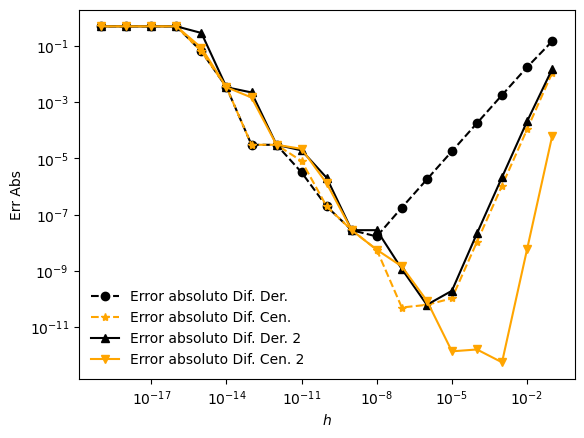

In [27]:
plt.plot(hval, EdatD, ls='--', c='k', marker='o', label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', c='orange', marker='*', label=r'Error absoluto Dif. Cen.')

plt.plot(hval, EdatD2, ls='-', c='k', marker='^', label=r'Error absoluto Dif. Der. 2')
plt.plot(hval, EdatC2, ls='-', c='orange', marker='v', label=r'Error absoluto Dif. Cen. 2')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False)

## Diferenciación automática

Cualitativamente, la diferenciación automática es equivalente a la diferenciación analítica de funciones elementales (incluyendo regla de la cadena) evaluadas en un punto. La diferenciación automática es considerablemente más precisa que las diferencias finitas producto de esta equivalencia con la simbólica, sin embargo a diferencia de la primera no se necesita una expresión general.

### Número duales

A continuación definamos un nuevo tipo de "número" añadiendo una segunda componente a cualquier número $\mathbf{a}$ (que no especificaremos que es)

<center><img src="capturas/73.png"></center>

Estos número se suelen llamar número duales, donde la $d$ es simplemente una etiqueta que señala que es la segunda componente, algo similar a los números complejos donde $i$ indicaba la componente imaginaria y $i^2=-1$, en este caso se tendrá que $d^2=0$. 

`COMENTARIO`: Este tipo de algebra donde el cuadrado es cero, pero $d$ no, no es única de esta algebra, por ejemplo también ocurre en el algebra de [Grassmann](https://en.wikipedia.org/wiki/Grassmann_number)

Veamos el resultado de realizar ciertas operaciones algebraicas:

<center><img src="capturas/74.png"></center>

<center><img src="capturas/75.png"></center>

**¿Notan algo curioso?** 

El resultado del segundo término es el que se obtendría si aplicaramos las reglas de derivación, si asumimos que el segundo término es el valor de la derivada en el punto. Es decir, tendríamos una tupla donde la primera componente es el valor de la función en el punto y el segundo el de la derivada

<center><img src="capturas/76.png"></center>

Veamos a continuación el resultado de realizar otras operaciones algebráicas `(probar)`:

<center><img src="capturas/77.png"></center>

Como se aprecia, se sigue cumpliendo lo comentado con anterioridad, ya casi tenemos un algebra creada. Sin embargo falta algo,

- constantes términos
- variables independientes

Para resolver esto se definen:

<center><img src="capturas/78.png"></center>

Donde $\mathbf{A}$ representa a un término constante (su derivada es cero), mientras que $\mathbf{x}$ la variable independiente (su derivada es uno). Con estas dos definiciones tenemos ya el algebra construida, veamos como usarla.

`Ejemplo 1`

Consideremos la función 

<center><img src="capturas/79.png"></center>

y calculemos el valor de su derivada en el punto $x=6$. De forma analítica tendríamos que derivar toda la expresión anterior llegando a ser engorroso. Apliquemos entonces la metodología de Diferenciación automática

<center><img src="capturas/80.png"></center>

Ya tenemos la expresión expresada en numeros duales, ahora solo queda evaluarla.

<center><img src="capturas/81.png"></center>

Tendremos entonces que el valor de la derivada en el punto es $f'(6)=1/2$.

`Ejercicio`: Obtenga el valor de la derivada de la función 
$$
f(x)=\frac{(x-2)(x+2)}{(x-3)(x-4)}
$$
en el punto $x=6$.

### Funciones especiales

Ahora, que pasaría si queremos obtener la derivada de funciones como por ejemplo:

$$f(x)=x^2\sin x$$

pues las operaciones que hemos visto hasta ahora no son de mucha ayuda.

Intentemos obtener las reglas para estas funciones. Primero consideremos el caso de los polinomios:

<center><img src="capturas/82.png"></center>

Si promovemos $a$ a un número dual $\mathbf{a}$ y utilizamos las operaciones anteriores tendremos que el término cuadrático y el cúbico se reducen a:

<center><img src="capturas/83.png"></center>

Reescribiendo las constantes $c_i$ como numeros duales $(c_i, 0)$ tendremos (`probar`)

<center><img src="capturas/84.png"></center>

Lo cual como se aprecia no es más que la regla de la cadena. Notar que: En la segunda línea se realizarón todas las multiplicaciones. En la tercera se tomarón las sumas. En la cuarta se identifican en la segunda componente la presencia de $p'$, es decir, la derivada del polinomio.

El resultado anterior probó la regla de la cadena explícitamente para polinomios, para el caso de otras fuciones como el coseno de un número dual, etc. también se sigue compliendo, de tal forma que tendremos:

<center><img src="capturas/85.png"></center>

Que aplicado a las funciones especiales tendremos:

<center><img src="capturas/86.png"></center>

`Ejemplo 2`

Consideremos la función $f(x)=e^{\sin(2x)}$ y calculemos su derivada en $x=0.5$. Promoviendo las variables y constantes a números duales tendremos

<center><img src="capturas/87.png"></center>

lo que nos lleva a

<center><img src="capturas/88.png"></center>

Lo que conduce a que la derivada en $f'(0.5) \approx 2.506 761 534 986 894$


`Ejercicio`: Obtenga el valor de la derivada de las funciones en el punto $x=0.5$:

- $f(x)=x^2\sin x$ 
- $f(x)= (\sin x)^{\tan x}$


### Tarea

- Calcule la segunda derivada de la función
$$f(x)=\frac{1-\cos x}{x^2}$$
en el punto $x=0.004$